In [ ]:
!pip install transformers torchaudio spacy pandas kaggle
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'your_username'
os.environ['KAGGLE_KEY'] = 'your_api_key'
!kaggle datasets download -d [dataset-name]


403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/your_username/%5Bdataset-name%5D


In [ ]:
import os
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torchaudio
import torch

def transcribe_audio(file_path):
    # Check if file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    # Load model and processor
    processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
    model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

    # Load audio file
    waveform, sample_rate = torchaudio.load(file_path)

    # Resample to 16kHz if necessary
    if sample_rate != 16000:
        resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
        waveform = resampler(waveform)

    # Process audio and get logits
    inputs = processor(waveform.squeeze().numpy(), return_tensors="pt", sampling_rate=16000)
    with torch.no_grad():
        logits = model(**inputs).logits

    # Decode predicted IDs to text
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)[0]

    return transcription

# Example usage
if __name__ == "__main__":
    audio_path = "sample_speech.wav"  # Replace with your file path
    try:
        transcription = transcribe_audio(audio_path)
        print(f"Transcription: {transcription}")
    except FileNotFoundError as e:
        print(e)


File not found: sample_speech.wav


In [ ]:
from google.colab import files

uploaded = files.upload()  # Upload 'sample_speech.wav'


Saving grammar_scoring_500_samples.csv to grammar_scoring_500_samples.csv


In [ ]:
audio_path = "sample_speech.wav"


In [ ]:
import pandas as pd
import torchaudio
import torch
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import os

# Load model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Read the CSV
df = pd.read_csv("grammar_scoring_500_samples.csv")

# Add a new column to hold transcriptions
transcriptions = []

for file in df["audio_file"]:
    try:
        # Load audio
        waveform, sample_rate = torchaudio.load(file)

        # Resample if necessary
        if sample_rate != 16000:
            resampler = torchaudio.transforms.Resample(orig_freq=sample_rate, new_freq=16000)
            waveform = resampler(waveform)

        # Prepare inputs
        inputs = processor(waveform.squeeze(), return_tensors="pt", sampling_rate=16000)

        with torch.no_grad():
            logits = model(**inputs).logits
        predicted_ids = torch.argmax(logits, dim=-1)
        transcription = processor.batch_decode(predicted_ids)[0]

    except Exception as e:
        transcription = f"Error: {str(e)}"

    transcriptions.append(transcription)

# Add transcription to DataFrame and save
df["transcription"] = transcriptions
df.to_csv("transcribed_grammar_data.csv", index=False)


In [ ]:
import logging
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)


In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import pandas as pd

# Load CSV with transcriptions and grammar scores (rounded or bucketed)
df = pd.read_csv("transcribed_grammar_data.csv")

# Optional: Convert grammar_score (0–100) to discrete labels (e.g., 0 = Bad, 1 = Average, 2 = Good)
def label_grammar_score(score):
    if score >= 85:
        return 2  # Good
    elif score >= 70:
        return 1  # Average
    else:
        return 0  # Bad

df["label"] = df["grammar_score"].apply(label_grammar_score)

# Prepare Dataset
dataset = Dataset.from_pandas(df[["transcription", "label"]])

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize data
def tokenize(example):
    return tokenizer(example["transcription"], padding="max_length", truncation=True)

tokenized_dataset = dataset.map(tokenize, batched=True)
tokenized_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# Load model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    evaluation_strategy="no",
    save_strategy="epoch",
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=10,
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset
)

# Train model
trainer.train()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: shivambhagat2003 (shivambhagat2003-vellore-institute-of-technology) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.804200
20,0.803300
30,0.833600
40,0.812100
50,0.827200
60,0.861500
70,0.717500
80,0.783800
90,0.793500
100,0.805200


TrainOutput(global_step=189, training_loss=0.7977269818543127, metrics={'train_runtime': 358.2042, 'train_samples_per_second': 4.188, 'train_steps_per_second': 0.528, 'total_flos': 394670126592000.0, 'train_loss': 0.7977269818543127, 'epoch': 3.0})

In [ ]:
model.save_pretrained('/content/drive/MyDrive/grammar_model')


In [ ]:
def type_token_ratio(text):
    tokens = text.split()
    return len(set(tokens)) / len(tokens)


In [ ]:
print(df.columns.tolist())


['audio_file', 'transcription', 'grammar_errors', 'grammar_score', 'label']


In [26]:
!pip install language-tool-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 3.6 MB/s eta 0:00:00


In [27]:
!pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.7 MB/s eta 0:00:00


In [29]:
from google.colab import files
uploaded = files.upload()


Saving grammar_scoring_500_samples.csv to grammar_scoring_500_samples (1).csv


INFO:language_tool_python.download_lt:Unzipping /tmp/tmp8khkocs_.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.5.zip to /root/.cache/language_tool_python.


✅ Mean Squared Error: 142.45
✅ R² Score: 0.34


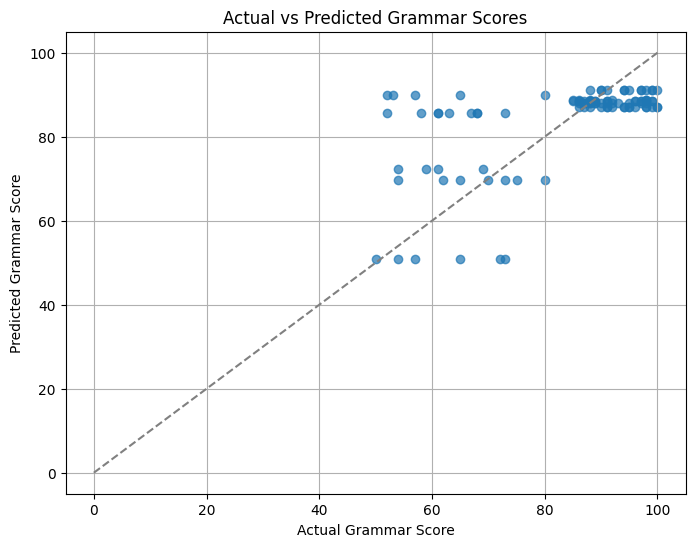

In [31]:
import pandas as pd
import language_tool_python
from textstat import flesch_reading_ease
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load uploaded CSV (replace filename if needed)
df = pd.read_csv('grammar_scoring_500_samples.csv')

# Initialize grammar checker
tool = language_tool_python.LanguageTool('en-US')

# Feature extraction functions
def count_grammar_errors(text):
    return len(tool.check(str(text)))  # Ensure it's a string

def measure_complexity(text):
    try:
        return 100 - flesch_reading_ease(str(text))  # Lower readability = more complex
    except:
        return 50  # Default fallback value

# Generate features
df['error_count'] = df['transcription'].apply(count_grammar_errors)
df['complexity'] = df['transcription'].apply(measure_complexity)

# Prepare data
X = df[['error_count', 'complexity']]
y = df['grammar_score']  # Update if your column is named differently

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print(f"✅ Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"✅ R² Score: {r2_score(y_test, y_pred):.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Grammar Score")
plt.ylabel("Predicted Grammar Score")
plt.title("Actual vs Predicted Grammar Scores")
plt.plot([0, 100], [0, 100], '--', color='gray')  # Ideal line
plt.grid(True)
plt.show()
